# 6. Tissue Partitioning Module Tutorial

This notebook demonstrates how to use the `partition.py` module to Label each sarcomere with `horizontal_region` and `vertical_region`.

In [2]:
# ==== IMPORTS ====
import pandas as pd

from pathlib import Path

from src.partition import partition_sarcomere_data

print("✅ Imports completed.")

✅ Imports completed.


In [4]:
# --- Configuration ---
INPUT_DIR = Path("data")
OUTPUT_DIR = Path("results")

ND2_FILENAME = "Quartz.2862.D1.Myk.baseline.GFP.m002.nd2" # <<< IMPORTANT: CHANGE THIS TO YOUR ND2 FILE NAME
OUTPUT_FILENAME = ND2_FILENAME[:-4]

In [7]:
# ==== USER INPUTS ====
# Path to the detected-sarcomeres CSV and bounding-box NPZ
SARCOMERE_CSV = OUTPUT_DIR / f"{OUTPUT_FILENAME}_detection_results_sarcomeres.csv"
BOUNDING_BOX_NPZ = OUTPUT_DIR / f"{OUTPUT_FILENAME}_segmentation_results.npz"

# Optionally, specify output CSV (defaults to overwrite the input CSV)
OUTPUT_CSV = OUTPUT_DIR / f"{OUTPUT_FILENAME}_sarcs_partitioned.csv"

print("✅ Paths set.")

✅ Paths set.


In [8]:
# ==== RUN PARTITION MODULE ====
# Run partitioning and label sarcomere regions
annotated_df = partition_sarcomere_data(
    sarcomere_csv=SARCOMERE_CSV,
    bounding_box_npz=BOUNDING_BOX_NPZ,
    output_csv=OUTPUT_CSV
)

# Display first few rows of the annotated DataFrame
annotated_df.head()

Saved partition-labeled sarcomere data to results/Quartz.2862.D1.Myk.baseline.GFP.m002_sarcs_partitioned.csv


,frame,sarc_id,x,y,length,width,angle,zdiscs,horizontal_region,vertical_region
0,0,0,95.305358,1522.538370,7.995815,5.275037,0.100153,"6,7",right,top
1,0,1,101.876578,1363.703761,11.359758,10.690429,2.369982,"8,30",right,top
2,0,4,99.986302,1470.429642,10.913777,4.999087,0.397730,"15,26",right,top
3,0,5,99.924068,1551.572227,9.832028,6.069684,0.029214,"16,23",right,top
4,0,6,100.626263,1499.299945,10.724353,6.715822,0.301157,"20,27",right,top


In [9]:
annotated_df

,frame,sarc_id,x,y,length,width,angle,zdiscs,horizontal_region,vertical_region
0,0,0,95.305358,1522.538370,7.995815,5.275037,0.100153,"6,7",right,top
1,0,1,101.876578,1363.703761,11.359758,10.690429,2.369982,"8,30",right,top
2,0,4,99.986302,1470.429642,10.913777,4.999087,0.397730,"15,26",right,top
3,0,5,99.924068,1551.572227,9.832028,6.069684,0.029214,"16,23",right,top
4,0,6,100.626263,1499.299945,10.724353,6.715822,0.301157,"20,27",right,top
...,...,...,...,...,...,...,...,...,...,...
896964,1518,699,305.607686,1039.581532,11.020841,7.483278,3.103829,"1060,1061",center,bottom
896965,1518,702,313.126180,967.969647,12.118975,5.472789,0.247588,"1070,1076",center,bottom
896966,1518,703,314.622480,762.485205,13.005289,5.882059,0.000968,"1071,1074",center,bottom
896967,1518,704,314.669333,955.425455,13.339469,4.909158,0.008722,"1075,1076",center,bottom


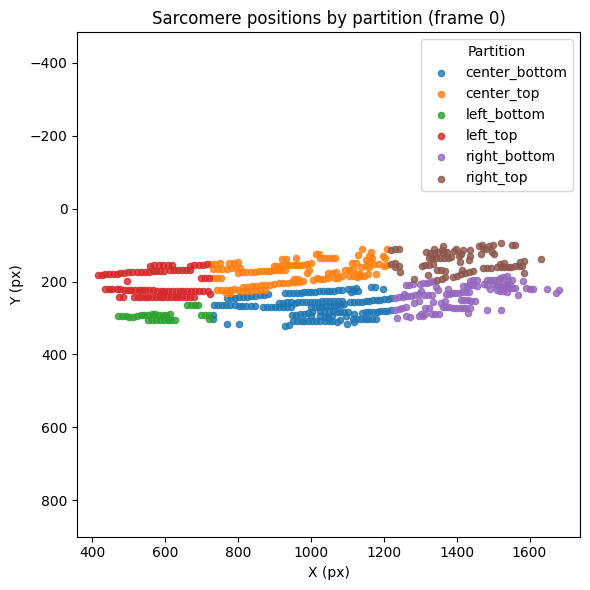

In [11]:
import matplotlib.pyplot as plt

# Assume `annotated_df` is your partition‐labeled DataFrame
# and PIXEL_TO_MICRON is defined if you want micron units

# 1) Filter to frame 0
df0 = annotated_df[annotated_df['frame'] == 0].copy()

# 2) Combine horizontal & vertical labels into one region key
df0['region'] = df0['horizontal_region'] + '_' + df0['vertical_region']

# 3) Plot each region in a different color
plt.figure(figsize=(6,6))
for region, group in df0.groupby('region'):
    plt.scatter(
        group['y'], 
        group['x'], 
        s=20, 
        label=region, 
        alpha=0.8
    )

plt.axis('equal')
plt.legend(title='Partition')
plt.xlabel('X (px)')
plt.ylabel('Y (px)')
plt.title('Sarcomere positions by partition (frame 0)')
plt.gca().invert_yaxis()  # if origin is top‐left
plt.tight_layout()
plt.show()